# Coporate Project: Credicorp

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
original_df=pd.read_parquet('dbforobjects.parquet', engine='pyarrow')
#df = pd.read_csv('dbforobjects.csv')

# Data Types

In [ ]:
data_types = original_df.dtypes
data_type_counts = data_types.value_counts()
summary_table = pd.DataFrame({'data_type': data_type_counts.index, 'count': data_type_counts.values})
print(summary_table)

In [ ]:
original_df.head()

In [ ]:
df = original_df.copy()

# Feature Engineering

In [ ]:
categorical_variables = df.select_dtypes(include='object')

In [ ]:
categorical_variables.info()

In [ ]:
categorical_variables

In [ ]:
# plot for unique values in dcnae_agr3
print(categorical_variables.CENTRO_ASISTENCIA.value_counts())
categorical_variables.CENTRO_ASISTENCIA.value_counts().plot(kind='bar', figsize=(50,5))

In [ ]:
# drop centro_asistencia
categorical_variables = categorical_variables.drop(columns=['CENTRO_ASISTENCIA'])

In [ ]:
# take away the b' for every column that has it in the beginning for every column
for column in categorical_variables.columns:
    categorical_variables[column] = categorical_variables[column].str[1:]

In [ ]:
# unique values for each feature
categorical_variables.value_counts()

In [ ]:
# change the data type of the the columns with numerical information to float, take away the apostrophes
#categorical_variables[['primer_grado_codmes','ult_grado_codmes']] = categorical_variables[['primer_grado_codmes','ult_grado_codmes']].apply(lambda x: x.str[1:-1]).astype(float)

### Columns: 'primer_grado_codmes' & 'ult_grado_codmes'

In [ ]:
# change the data type of the the columns with numerical information to float, take away the apostrophes
categorical_variables[['primer_grado_codmes','ult_grado_codmes']] = categorical_variables[['primer_grado_codmes','ult_grado_codmes']].apply(lambda x: x.str[1:-1])

In [ ]:
categorical_variables.primer_grado_codmes.info()

In [ ]:
#categorical_variables['primer_grado_codmes'] = categorical_variables['primer_grado_codmes'].astype(str)
#categorical_variables['ult_grado_codmes'] = categorical_variables['ult_grado_codmes'].astype(str)

In [ ]:
# Agregar día ficticio
categorical_variables['primer_grado_codmes'] = categorical_variables['primer_grado_codmes'] + '01'
categorical_variables['ult_grado_codmes'] = categorical_variables['ult_grado_codmes'] + '01'

In [ ]:
# Convertir a datetime
categorical_variables['primer_grado_codmes'] = pd.to_datetime(categorical_variables['primer_grado_codmes'], format='%Y%m%d', errors='coerce')
categorical_variables['ult_grado_codmes'] = pd.to_datetime(categorical_variables['ult_grado_codmes'], format='%Y%m%d', errors='coerce')

# Verificar el resultado
print(categorical_variables[['primer_grado_codmes', 'ult_grado_codmes']])


In [ ]:
# Aplicar imputación (forward fill)
categorical_variables['primer_grado_codmes_ffill'] = categorical_variables['primer_grado_codmes'].fillna(method='ffill')

# Aplicar imputación (backward fill)
#categorical_variables['primer_grado_codmes_bfill'] = categorical_variables['primer_grado_codmes'].fillna(method='bfill')

In [ ]:
# Aplicar imputación (forward fill)
categorical_variables['ult_grado_codmes_ffill'] = categorical_variables['ult_grado_codmes'].fillna(method='ffill')

# Aplicar imputación (backward fill)
#categorical_variables['primer_grado_codmes_bfill'] = categorical_variables['ult_grado_codmes'].fillna(method='bfill')

In [ ]:
categorical_variables[['primer_grado_codmes_ffill','primer_grado_codmes_ffill']]

In [ ]:
categorical_variables

In [ ]:
categorical_variables = categorical_variables.drop(columns=['primer_grado_codmes','ult_grado_codmes'])

In [ ]:
epoch = pd.Timestamp('1970-01-01')

categorical_variables['primer_grado_codmes'] = (categorical_variables['primer_grado_codmes_ffill'] - epoch).dt.days
categorical_variables['ult_grado_codmes'] = (categorical_variables['ult_grado_codmes_ffill'] - epoch).dt.days

In [ ]:
categorical_variables = categorical_variables.drop(columns=['primer_grado_codmes_ffill','ult_grado_codmes_ffill'])

In [ ]:
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=50)
#categorical_variables[['primer_grado_codmes','ult_grado_codmes']] = imputer.fit_transform(categorical_variables[['primer_grado_codmes','ult_grado_codmes']])

In [ ]:
#categorical_variables['primer_grado_codmes'] = categorical_variables['primer_grado_codmes'].fillna(categorical_variables['primer_grado_codmes'].median())
#categorical_variables['ult_grado_codmes'] = categorical_variables['ult_grado_codmes'].fillna(categorical_variables['ult_grado_codmes'].median())
#categorical_variables['primer_grado_codmes'] = categorical_variables['primer_grado_codmes'].fillna(categorical_variables['primer_grado_codmes'].mean())
#categorical_variables['ult_grado_codmes'] = categorical_variables['ult_grado_codmes'].fillna(categorical_variables['ult_grado_codmes'].mean())
#categorical_variables['primer_grado_codmes'] = categorical_variables['primer_grado_codmes'].fillna(categorical_variables['primer_grado_codmes'].mode())
#categorical_variables['ult_grado_codmes'] = categorical_variables['ult_grado_codmes'].fillna(categorical_variables['ult_grado_codmes'].mode())

In [ ]:
categorical_variables.isnull().sum()

In [ ]:
categorical_variables.value_counts()

### Columns: 'dem_des_departamento' / 'dem_des_provincia' / 'dem_des_distrito'

In [ ]:
categorical_variables.dem_des_departamento.value_counts()

In [ ]:
# merge three location columns into one and drop them
#categorical_variables['location'] = categorical_variables['dem_des_departamento'] + ', ' + categorical_variables['dem_des_provincia'] + ', ' + categorical_variables['dem_des_distrito']
#categorical_variables = categorical_variables.drop(['dem_des_departamento', 'dem_des_provincia', 'dem_des_distrito'], axis=1)

In [ ]:
categorical_variables = categorical_variables.drop(columns=['dem_des_provincia', 'dem_des_distrito'])

In [ ]:
'''# Define a custom mapping for locations in Peru with hypothetical coordinates
city_mapping = {
    "b'LM'": {"latitude": -12.0464, "longitude": -77.0428},   # Lima
    "b'LE'": {"latitude": -12.0432, "longitude": -77.0282},   # La Libertad
    "b'LC'": {"latitude": -11.9916, "longitude": -77.0910},   # Lambayeque
    "b'PROV'": {"latitude": -11.7660, "longitude": -76.5050}, # Provincia
    "b'LS'": {"latitude": -13.5319, "longitude": -71.9675},   # Loreto
    "b'LN'": {"latitude": -11.9594, "longitude": -77.0521},   # La Niña
    "b'LP'": {"latitude": -12.1277, "longitude": -77.0284},   # La Punta
    "b'CA'": {"latitude": -12.0432, "longitude": -77.0282}    # Callao
}

# Apply the mapping to create new latitude and longitude columns
categorical_variables['location_Latitude'] = categorical_variables['location'].map(lambda x: city_mapping[x]['latitude'])
categorical_variables['location_Longitude'] = categorical_variables['location'].map(lambda x: city_mapping[x]['longitude'])

# Drop the original column
categorical_variables = categorical_variables.drop(columns=['location'])'''


In [ ]:
#categorical_variables.location.value_counts()

In [ ]:
# llenar las filas en la columna de sexo con valores nulos a 'F'
categorical_variables['dem_des_sexo'] = categorical_variables['dem_des_sexo'].fillna("'F'")

In [ ]:
# conversión directa de la columna de sexo a enteros (1 para masculino y 0 para femenino), eliminación de las comillas y llenar los valores nulos con np.nan
categorical_variables['dem_des_sexo'] = categorical_variables['dem_des_sexo'].replace({"'M'": 1, "'F'": 0})

In [ ]:
categorical_variables['dem_des_sexo'].isnull().sum()

In [ ]:
categorical_variables.dem_des_sexo.value_counts()

In [ ]:
categorical_variables.info()

In [ ]:
# save the file as parquet
#categorical_variables.to_parquet('categorical_variables_imputed.parquet', engine='pyarrow')

### Encoding

In [ ]:
'''import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# One-Hot Encoding para varias columnas
one_hot_cols = ['tipo_empleo', 'TIPO_SEGURO', 'CENTRO_MEDICO', 
                'codclusterfuenteingreso', 'dem_des_estadocivil1', 'dem_des_macrozonadem',
                'dem_des_tipsituacioncasa', 'location', 'dem_des_niveleducacional2']

categorical_variables = pd.get_dummies(categorical_variables, columns=one_hot_cols)'''


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# One-Hot Encoding para varias columnas
one_hot_cols = ['tipo_empleo', 'TIPO_SEGURO', 'CENTRO_MEDICO', 
                'codclusterfuenteingreso', 'dem_des_estadocivil1', 'dem_des_macrozonadem',
                'dem_des_tipsituacioncasa', 'dem_des_departamento', 'dem_des_niveleducacional2']

categorical_variables = pd.get_dummies(categorical_variables, columns=one_hot_cols)

In [ ]:
# Binary Encoding para columnas con muchas categorías
binary_cols = ['dem_des_grupo1profesion1', 'dem_des_grupo2profesion1', 'dem_des_profesion1']
binary_encoder = ce.BinaryEncoder()

for col in binary_cols:
    binary_encoded = binary_encoder.fit_transform(categorical_variables[col])
    categorical_variables = categorical_variables.join(binary_encoded).drop(columns=[col])

In [ ]:
# Ordinal Encoding para columnas con un orden inherente
ordinal_cols = ['max_grado', 'min_grado']
ordinal_mappings = {
    'max_grado': [None, "'BACHILLER'", "'TITULO'", "'MAESTRIA'", "'DOCTORADO'"],
    'min_grado': [None, "'BACHILLER'", "'TITULO'", "'MAESTRIA'", "'DOCTORADO'"]
}

for col in ordinal_cols:
    ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col]])
    categorical_variables[col] = ordinal_encoder.fit_transform(categorical_variables[[col]])

In [ ]:
categorical_variables

In [ ]:
categorical_variables = categorical_variables.astype(float)

In [ ]:
# check for null values
categorical_variables.isnull().sum()

In [ ]:
categorical_variables_2 = categorical_variables.copy()

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
train_data = categorical_variables_2[categorical_variables_2['dem_des_sexo'].notnull()]
test_data = categorical_variables_2[categorical_variables_2['dem_des_sexo'].isnull()]

# Características y etiquetas
X_train = train_data.drop(columns=['dem_des_sexo'])
y_train = train_data['dem_des_sexo']
X_test = test_data.drop(columns=['dem_des_sexo'])

# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Imputar los valores faltantes
predicted_genders = model.predict(X_test)
categorical_variables_2.loc[categorical_variables_2['dem_des_sexo'].isnull(), 'dem_des_sexo'] = predicted_genders'''


In [ ]:
#difference = categorical_variables_2.dem_des_sexo.value_counts() - categorical_variables.dem_des_sexo.value_counts() 
#difference

In [ ]:
categorical_variables_2.isnull().sum()

In [ ]:
# save the file as parquet
#categorical_variables_2.to_parquet('categorical_variables_encoded.parquet', engine='pyarrow')

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

df = categorical_variables_2.copy()

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df.info()

In [ ]:
scaled_df.info()

In [ ]:
# save the file as parquet
#scaled_df.to_parquet('categorical_variables_scaled.parquet', engine='pyarrow')

## Testing

In [1]:
import pandas as pd

In [2]:
# load the file as parquet
scaled_df = pd.read_parquet('categorical_variables_scaled.parquet', engine='pyarrow')

In [4]:
# merge the 'FH' variable from floats with the scaled_df dataframe
floats = pd.read_parquet('/Users/sebastianchombo/Documents/IE MBD/Credicorp Capstone/floats_notnulled.parquet')
floats = floats.astype(float)
floats = floats[['FH','edad_t']]

In [5]:
scaled_df = pd.concat([scaled_df, floats], axis=1)
scaled_df

,dem_des_sexo,max_grado,min_grado,primer_grado_codmes,ult_grado_codmes,tipo_empleo_'1. Dependiente',tipo_empleo_'2. Independiente',tipo_empleo_'3. Informal',tipo_empleo_'99. Missing',TIPO_SEGURO_'AGRARIO DEPENDIENTE',...,dem_des_profesion1_0,dem_des_profesion1_1,dem_des_profesion1_2,dem_des_profesion1_3,dem_des_profesion1_4,dem_des_profesion1_5,dem_des_profesion1_6,dem_des_profesion1_7,FH,edad_t
0,-1.170357,2.917241,1.184038,-1.067016,0.840196,0.611038,-0.538072,-0.214923,-0.056584,-0.069418,...,-0.184348,-0.237051,-0.402759,-0.423509,-0.512991,-1.076942,-1.261676,0.964317,-0.492055,0.689043
1,0.854440,2.917241,1.184038,-2.052725,0.458369,0.611038,-0.538072,-0.214923,-0.056584,-0.069418,...,-0.184348,-0.237051,-0.402759,-0.423509,-0.512991,-1.076942,0.792597,-1.037003,-0.122627,1.931559
2,-1.170357,-0.705951,-0.778353,-2.052725,0.458369,0.611038,-0.538072,-0.214923,-0.056584,-0.069418,...,-0.184348,-0.237051,-0.402759,-0.423509,-0.512991,-1.076942,0.792597,0.964317,-0.006776,0.600292
3,0.854440,-0.705951,-0.778353,-2.052725,0.458369,-1.636560,1.858486,-0.214923,-0.056584,-0.069418,...,-0.184348,-0.237051,-0.402759,-0.423509,-0.512991,0.928555,-1.261676,-1.037003,1.730983,0.866545
4,0.854440,-0.705951,-0.778353,-2.052725,0.458369,0.611038,-0.538072,-0.214923,-0.056584,-0.069418,...,-0.184348,-0.237051,-0.402759,-0.423509,-0.512991,0.928555,-1.261676,0.964317,-0.107375,1.044048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357190,-1.170357,-0.705951,-0.778353,1.230561,1.091756,-1.636560,-0.538072,-0.214923,17.672831,-0.069418,...,-0.184348,-0.237051,-0.402759,-0.423509,-0.512991,-1.076942,0.792597,0.964317,-0.602205,-0.553473
357191,-1.170357,-0.705951,-0.778353,1.230561,1.091756,-1.636560,-0.538072,-0.214923,17.672831,-0.069418,...,-0.184348,-0.237051,-0.402759,-0.423509,-0.512991,0.928555,0.792597,0.964317,-0.602205,-1.085980
357192,0.854440,-0.705951,-0.778353,1.230561,1.091756,-1.636560,-0.538072,-0.214923,17.672831,-0.069418,...,-0.184348,-0.237051,-0.402759,-0.423509,-0.512991,-1.076942,0.792597,0.964317,0.266520,-0.287220
357193,-1.170357,-0.705951,-0.778353,1.230561,1.091756,-1.636560,-0.538072,-0.214923,17.672831,-0.069418,...,-0.184348,-0.237051,-0.402759,2.361227,-0.512991,0.928555,0.792597,0.964317,-0.398697,-0.287220


In [6]:
scaled_df.drop(columns=['primer_grado_codmes', 'ult_grado_codmes'], inplace=True)

In [7]:
scaled_df_cluster = scaled_df.copy()

### Deployment

In [8]:
from sklearn.cluster import KMeans

# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(scaled_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Agregar las etiquetas de los clusters al DataFrame original
scaled_df_cluster['cluster'] = kmeans.labels_
#scaled_df['cluster'] = kmeans.labels_
scaled_df_cluster.head()
#scaled_df.head()

,dem_des_sexo,max_grado,min_grado,tipo_empleo_'1. Dependiente',tipo_empleo_'2. Independiente',tipo_empleo_'3. Informal',tipo_empleo_'99. Missing',TIPO_SEGURO_'AGRARIO DEPENDIENTE',TIPO_SEGURO_'AGRARIO INDEPENDIENTE',TIPO_SEGURO_'CONSTRUCCION CIVIL',...,dem_des_profesion1_1,dem_des_profesion1_2,dem_des_profesion1_3,dem_des_profesion1_4,dem_des_profesion1_5,dem_des_profesion1_6,dem_des_profesion1_7,FH,edad_t,cluster
0,-1.170357,2.917241,1.184038,0.611038,-0.538072,-0.214923,-0.056584,-0.069418,-0.014492,-0.106876,...,-0.237051,-0.402759,-0.423509,-0.512991,-1.076942,-1.261676,0.964317,-0.492055,0.689043,3
1,0.854440,2.917241,1.184038,0.611038,-0.538072,-0.214923,-0.056584,-0.069418,-0.014492,-0.106876,...,-0.237051,-0.402759,-0.423509,-0.512991,-1.076942,0.792597,-1.037003,-0.122627,1.931559,3
2,-1.170357,-0.705951,-0.778353,0.611038,-0.538072,-0.214923,-0.056584,-0.069418,-0.014492,-0.106876,...,-0.237051,-0.402759,-0.423509,-0.512991,-1.076942,0.792597,0.964317,-0.006776,0.600292,3
3,0.854440,-0.705951,-0.778353,-1.636560,1.858486,-0.214923,-0.056584,-0.069418,-0.014492,-0.106876,...,-0.237051,-0.402759,-0.423509,-0.512991,0.928555,-1.261676,-1.037003,1.730983,0.866545,1
4,0.854440,-0.705951,-0.778353,0.611038,-0.538072,-0.214923,-0.056584,-0.069418,-0.014492,-0.106876,...,-0.237051,-0.402759,-0.423509,-0.512991,0.928555,-1.261676,0.964317,-0.107375,1.044048,1


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/Users/sebastianchombo/anaconda3/envs/pda-ie/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


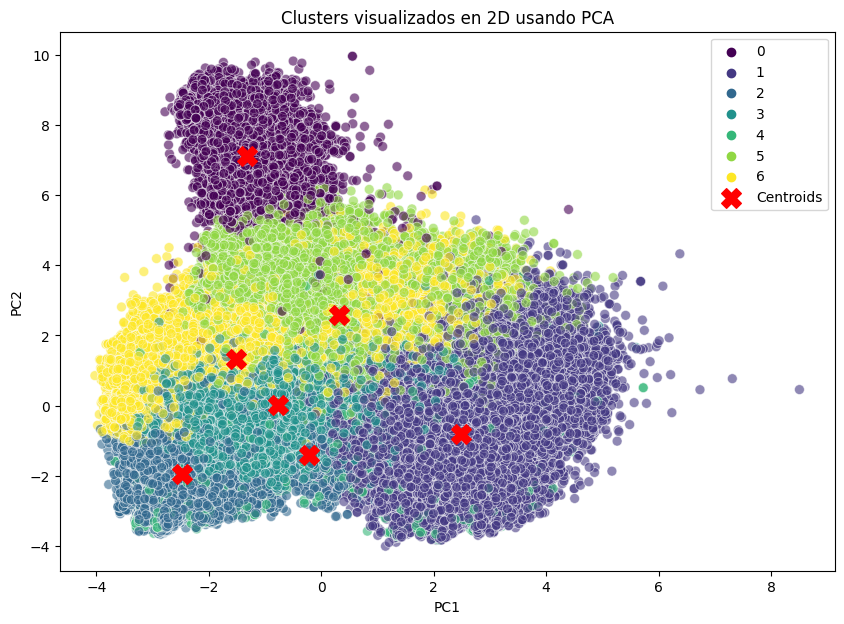

In [14]:
scaled_df_cluster = scaled_df_cluster.drop(columns=['cluster'])

# Labels y centroids del modelo KMeans
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reducir la dimensionalidad a n componentes principales
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df_cluster)

# Transformar los centroids utilizando PCA
centroids_pca = pca.transform(centroids)

# Crear un DataFrame con las componentes principales y las etiquetas de los clusters
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels

# Visualizar los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50, alpha=0.6)

# Añadir los centroids al gráfico
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Añadir título y leyenda
plt.title('Clusters visualizados en 2D usando PCA')
plt.legend()
plt.show()


In [15]:
pca_df.cluster.value_counts()

cluster
1    117974
3     78783
6     57697
2     56815
5     27576
0      9427
4      8923
Name: count, dtype: int64

In [16]:
# Obtener los loadings (cargas) de las variables para cada componente
loadings = pca.components_

# Convertir los loadings a un DataFrame para facilidad de análisis
loadings_df = pd.DataFrame(loadings.T, index=scaled_df_cluster.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Ver las cargas de las primeras componentes
print(loadings_df.head())

# Determinar las variables que más explican cada componente
def get_top_variables(loadings_df, n_top=5):
    top_vars = {}
    for col in loadings_df.columns:
        top_vars[col] = loadings_df[col].abs().sort_values(ascending=False).head(n_top).index.tolist()
    return top_vars

# Obtener las principales variables que explican cada componente principal
top_variables = get_top_variables(loadings_df, n_top=5)

print("Variables que más contribuyen a cada componente principal:")
for pc, vars in top_variables.items():
    print(f"{pc}: {vars}")

                                     PC1       PC2
dem_des_sexo                    0.003211 -0.119119
max_grado                       0.190063  0.021928
min_grado                       0.202580  0.033713
tipo_empleo_'1. Dependiente'    0.067733 -0.217239
tipo_empleo_'2. Independiente' -0.044086  0.188419
Variables que más contribuyen a cada componente principal:
PC1: ['dem_des_grupo1profesion1_3', 'dem_des_grupo2profesion1_5', 'dem_des_grupo2profesion1_4', 'dem_des_profesion1_7', 'dem_des_grupo1profesion1_4']
PC2: ['dem_des_grupo1profesion1_0', 'dem_des_profesion1_2', 'dem_des_grupo2profesion1_0', 'dem_des_profesion1_0', 'dem_des_profesion1_1']


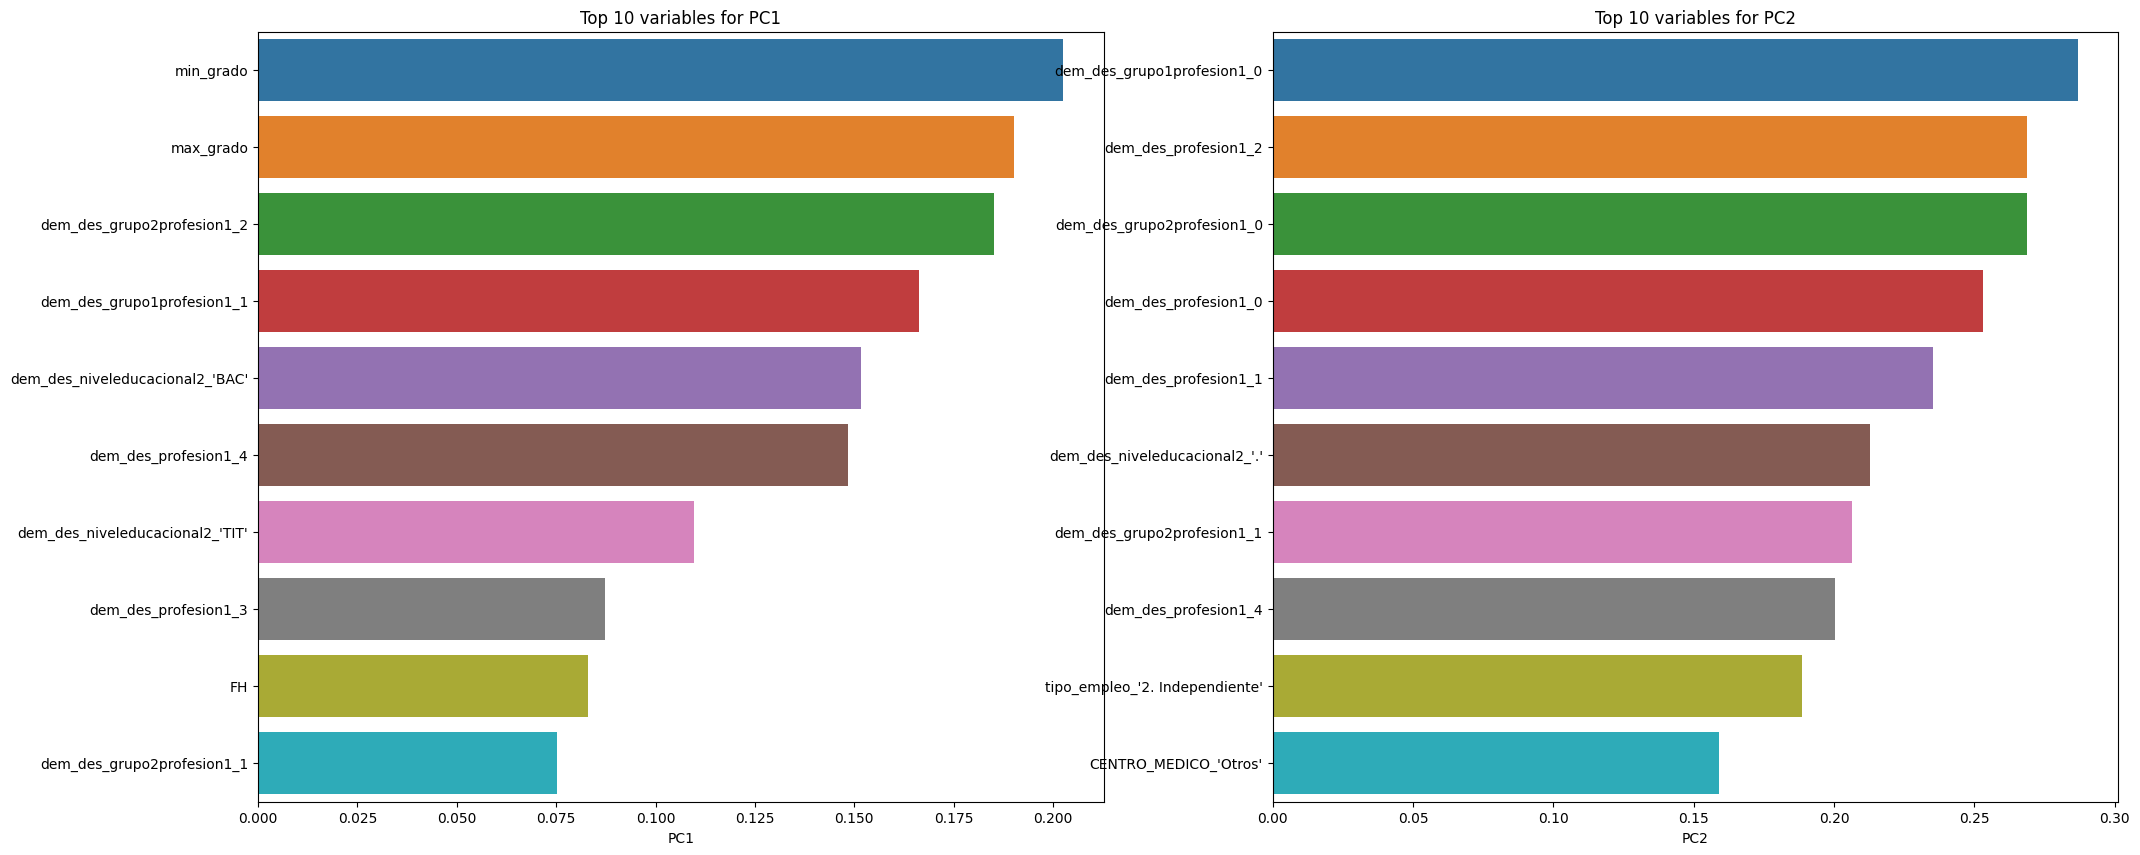

In [17]:
# plot the top ten features for each for only two pca
fig, ax = plt.subplots(1, 2, figsize=(24, 10))
for i, pc in enumerate(['PC1', 'PC2']):
    sns.barplot(x=loadings_df[pc].sort_values(ascending=False).head(10), y=loadings_df[pc].sort_values(ascending=False).head(10).index, ax=ax[i])
    ax[i].set_title(f'Top 10 variables for {pc}')

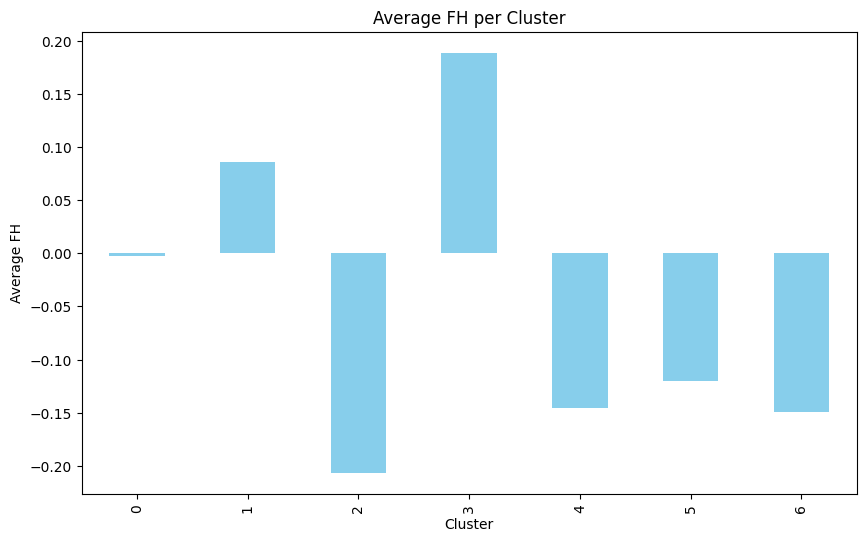

In [18]:
average_fh_per_cluster = scaled_df.groupby(labels)['FH'].mean()

plt.figure(figsize=(10, 6))
average_fh_per_cluster.plot(kind='bar', color='skyblue')
plt.title('Average FH per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average FH')
plt.show()

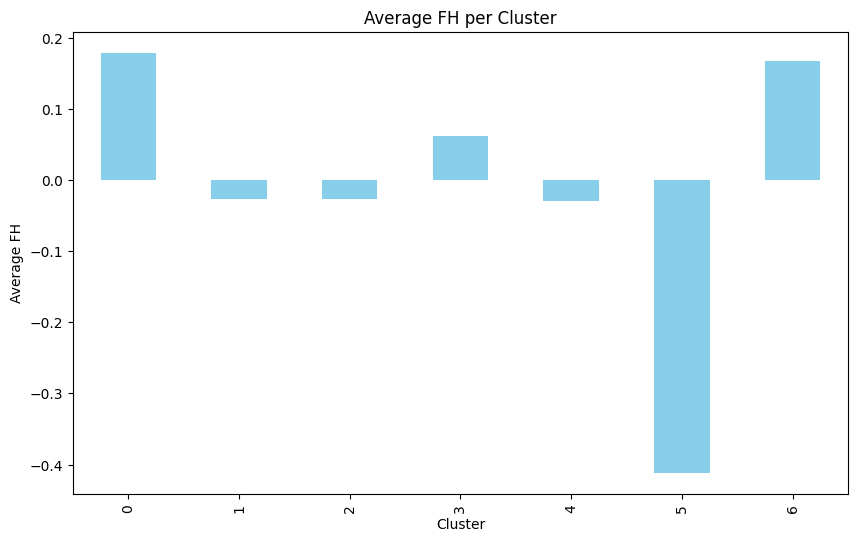

In [19]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

average_fh_per_cluster = scaled_df.groupby(labels)['edad_t'].mean()

plt.figure(figsize=(10, 6))
average_fh_per_cluster.plot(kind='bar', color='skyblue')
plt.title('Average FH per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average FH')
plt.show() 

### silhouette_score testing

In [ ]:
'''from sklearn.metrics import silhouette_score

cluster_labels = kmeans.fit_predict(categorical_variables)

# Step 2: Calculate Silhouette Score
score = silhouette_score(categorical_variables, cluster_labels)

print(f"Silhouette Score: {score}")'''

In [ ]:
#pca_df_subsample = pca_df.sample(n=1000, random_state=42)

In [ ]:
num_rows = int(len(scaled_df) * 0.3)
random_indices = np.random.choice(scaled_df.index, size=num_rows, replace=False)
shuffled_df = scaled_df.loc[random_indices].sample(frac=1).reset_index(drop=True)
df = shuffled_df

In [ ]:
X = df.values
#X = scaled_df.values

In [ ]:
def find_best_k(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    return silhouette_scores

In [ ]:
from sklearn.metrics import silhouette_score

max_k = 10
silhouette_scores = find_best_k(X, max_k)

best_k = np.argmax(silhouette_scores) + 2
print(f'Best number of clusters: {best_k}')

In [ ]:
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xticks(range(2, max_k + 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different cluster numbers')
plt.show()